# Design of Experiments for Low-Cost Sensor Systems

Low-cost gas sensors suffer from low performance due to interferences/cross-sensitivities, drifts, and large unit-to-unit variability. Current academic discussion revolves around correcting for interfering variables and improving sensor performance by using mappings, known as calibration functions, obtained from different machine learning algorithms, e.g., neural network, random forest, or (regularized) linear regression. This is a standard regression task and it is still a point of discussion which of these algorithms are most suitable for that kind of application as some algorithms are better than others at coping with non-linear systems.
However, recent research has shown that field calibration embedds artificial patterns into calibration models, so representative data from laboratory experiments is needed. The theory of experimental design provides configurations of variables with minimal confounding, i.e., correlations between variables.

In [1]:
# Import files.
import scipy as sp
from pyDOE2.doe_factorial import *
from pyDOE2.doe_composite import *
from pyDOE2.doe_box_behnken import *

# Import plotting library.
#%matplotlib inline
# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib import rc
# from matplotlib.pyplot import cm
# from mpl_toolkits.mplot3d import Axes3D

# Define line width and font size of plots
#plt.rcParams['lines.linewidth'] = 1.0
#plt.rcParams['font.size'] = 6.0
#plt.rcParams['axes.titlesize'] = 6.0

## Full Factorial Design

A factorial design is type of designed experiment that lets you study of the effects that several factors can have on a response. When conducting an experiment, varying the levels of all factors at the same time instead of one at a time lets you study the interactions between the factors.

A full factorial design is a design in which researchers measure responses at all combinations of the factor levels:

* 2-level full factorial designs that contain only 2-level factors (usually coded as -1 and 1).
* general full factorial designs that contain factors with more than two levels.

The number of runs necessary for a 2-level full factorial design is 2$^k$ where k is the number of factors. As the number of factors in a 2-level factorial design increases, the number of runs necessary to do a full factorial design increases quickly. For example, a 2-level full factorial design with 6 factors requires 64 runs; a design with 9 factors requires 512 runs. A half-fraction, fractional factorial design would require only half of those runs.

In [4]:
D = fullfact(7*[2])

## Fractional Factorial Designs

A fractional design is a design in which experimenters conduct only a selected subset or "fraction" of the runs in the full factorial design. Fractional factorial designs are a good choice when resources are limited or the number of factors in the design is large because they use fewer runs than the full factorial designs.

A fractional factorial design uses a subset of a full factorial design, so some of the main effects and two-way interactions are confounded and cannot be separated from the effects of other higher-order interactions. Usually experimenters are willing to assume the higher-order effects are negligible in order to achieve information about main effects and low-order interactions with fewer runs.

The successful use of fractional factorial designs is based on three key ideas:
1. **The sparsity principle.** When there are several variables, the system or process is likely to be driven primarly by some of the main effects and low-order interactions.
2. **The projection property.** Fractional factorial designs can be projected into stronger (larger) designs in the subset of significant factors.
3. **Sequential experimentation.** It is possible to combine the runs of two (or more) fractional factorials to construct sequentially larger designs to estimate the factor effects and interactions of interest.

### Design Resolution

Design resolutions describe how much the effects in a fractional factorial design are aliased with other effects. When you do a fractional factorial design, one or more of the effects are confounded, meaning they cannot be estimated separately from each other. Usually, you want to use a fractional factorial design with the highest possible resolution for the amount of fractionation required. For example, it is usually better to choose a design where main effects are confounded with three-way interactions (Resolution IV) instead of a design where main effects are confounded with two-way interactions (Resolution III).

Resolution III, IV, and V designs are most common:

**Resolution III**
* No main effects are aliased with any other main effect, but main effects are aliased with 2-factor interactions.

**Resolution IV**
* No main effects are aliased with any other main effect or 2-factor interactions, but some 2-factor interactions are aliased with other 2-factor interactions and main effects are aliased with 3-factor interactions.

**Resolution V**
* No main effects or 2-factor interactions are aliased with any other main effect or 2-factor interactions, but 2-factor interactions are aliased with 3-factor interactions and main effects are aliased with 4-factor interactions.

### Finding the Alias Structure of a Fractional Factorial Design
The entire set of aliases in a fractional factorial design is called the alias structure of the design. There is a fairly easy method for writing down the alias structure of a fractional design. This method depends on some simple observations about multiplying columns of +1's and -1's:

1. The letter I denotes the column consisting entirely of +1's.
2. Note that any column multiplied by itself yields column I. For example, A·A = A$^2$ = I, B·B = B$^2$ = I, and so forth.
3. Multiplying column I by any other column does not change the column. For example, A·I = I·A = A.

Using these facts, we can obtain the alias structure of any fractional factorial as follows:

1. First, write the p assignments of additional factors in equation form. These p equations are called the **design generators**.
2. Multiply each generator from step 1 by its left side to put each generator into the form I = w, where w is a "word" composed of several letters representing particular experimental factors (e.g., D = ABC becomes I = ABCD). It is also possible tocreate words with "-" signs, such as D = -ABC. If this is done, the resulting design will use a different fraction of the runs from the full 2$^k$ design.
3. Letting I = w$_1$, I = w$_2$, ..., I = w$_p$ denote the p design generators from step 2, form all possible products of the words w$_i$ (one at a time, two at a time, three at a time, etc.). Use the fact that squares of factors can be eliminated (e.g., A$^2$ = I and multiplying by I does not change anything). There will be a total of 2$^p$ words formed. This collection is called the **defining relation** of the design.
4. Multiply each word in the defining relation by all 2$^k$ - 1 effects based on k factors. Use the fact that squares of factors cancel out to simplify the products. The result is called the **alias structure** of the design.

### Resolution III

In this design, main effects are **confounded** with two-factor interactions.

In [14]:
# Create a design of Resolution III.
design = "A B C AB AC BC ABC" # This is the design generator: I = ABD = ACE = BCF = ABCD
D3 = fracfact(design)
print(D3)

[[-1. -1. -1.  1.  1.  1. -1.]
 [ 1. -1. -1. -1. -1.  1.  1.]
 [-1.  1. -1. -1.  1. -1.  1.]
 [ 1.  1. -1.  1. -1. -1. -1.]
 [-1. -1.  1.  1. -1. -1.  1.]
 [ 1. -1.  1. -1.  1. -1. -1.]
 [-1.  1.  1. -1. -1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.]]


In [21]:
fracfact("A B AB")

array([[-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [ 1.,  1.,  1.]])

### Resolution IV

In this design, main effects are **unconfounded** by two-factor interactions. Some two-factor interaction effects are **confounded** with other two-factor interactions.

In [12]:
# Create a design of Resolution IV.
design = "A B C D ABC BCD ACD" # This is the design generator: I = ABCE = BCDF = ACDG
D4 = fracfact(design)
print(D4)

[[-1. -1. -1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1. -1.  1.]
 [-1.  1. -1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1. -1.  1.  1.]
 [-1. -1.  1. -1.  1.  1.  1.]
 [ 1. -1.  1. -1. -1.  1. -1.]
 [-1.  1.  1. -1. -1. -1.  1.]
 [ 1.  1.  1. -1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.  1.  1.]
 [ 1. -1. -1.  1.  1.  1. -1.]
 [-1.  1. -1.  1.  1. -1.  1.]
 [ 1.  1. -1.  1. -1. -1. -1.]
 [-1. -1.  1.  1.  1. -1. -1.]
 [ 1. -1.  1.  1. -1. -1.  1.]
 [-1.  1.  1.  1. -1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.]]


### Resolution VII

In this design, main effects are **unconfounded** by many higher order interactions. Some higher-factor interaction effects are **confounded** with other higher order interactions.

In [2]:
# Create another design of Resolution IV.
design = "A B C D ABCD ABC"
D7 = fracfact(design)
print(D7)

[[-1. -1. -1. -1.  1. -1.]
 [ 1. -1. -1. -1. -1.  1.]
 [-1.  1. -1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1. -1.]
 [-1. -1.  1. -1. -1.  1.]
 [ 1. -1.  1. -1.  1. -1.]
 [-1.  1.  1. -1.  1. -1.]
 [ 1.  1.  1. -1. -1.  1.]
 [-1. -1. -1.  1. -1. -1.]
 [ 1. -1. -1.  1.  1.  1.]
 [-1.  1. -1.  1.  1.  1.]
 [ 1.  1. -1.  1. -1. -1.]
 [-1. -1.  1.  1.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.]]


In [21]:
k = 3
d_full = ff2n(k)
d_fract = fracfact("A B AB")
d_full3 = fullfact(k*[3])-1.0
d_composite = ccdesign(k, center=(1, 0), alpha="r", face="ccc")
d_bb = bbdesign(k, center=1)

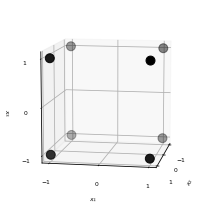

In [69]:
fig = plt.figure(figsize=(1.2*2.95,1.2*2.95))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(d_full[:,0], d_full[:,1], d_full[:,2], color=plt.cm.Greys(255), marker="o", s=80, depthshade=True)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_3$")
ax.set_xticks((-1, 0, 1))
ax.set_yticks((-1, 0, 1))
ax.set_zticks((-1, 0, 1))
ax.view_init(10, 10)
plt.savefig("./figures/fullfact",dpi=1200,transparent=True,orientation="landscape",bbox_inches="tight")
plt.show()

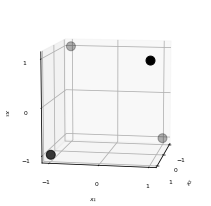

In [70]:
fig = plt.figure(figsize=(1.2*2.95,1.2*2.95))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(d_fract[:,0], d_fract[:,1], d_fract[:,2], color=plt.cm.Greys(255), marker="o", s=80, depthshade=True)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_3$")
ax.set_xticks((-1, 0, 1))
ax.set_yticks((-1, 0, 1))
ax.set_zticks((-1, 0, 1))
ax.view_init(10, 10)
plt.savefig("./figures/fracfact",dpi=1200,transparent=True,orientation="landscape",bbox_inches="tight")
plt.show()

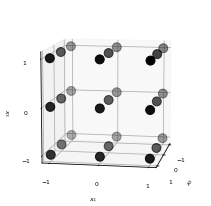

In [76]:
fig = plt.figure(figsize=(1.2*2.95,1.2*2.95))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(d_full3[:,0], d_full3[:,1], d_full3[:,2], color=plt.cm.Greys(255), marker="o", s=80, depthshade=True)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_3$")
ax.set_xticks((-1, 0, 1))
ax.set_yticks((-1, 0, 1))
ax.set_zticks((-1, 0, 1))
ax.view_init(10, 10)
plt.savefig("./figures/fullfact3",dpi=1200,transparent=True,orientation="landscape",bbox_inches="tight")
plt.show()

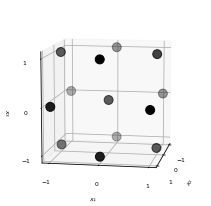

In [80]:
fig = plt.figure(figsize=(1.2*2.95,1.2*2.95))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(d_bb[:,0], d_bb[:,1], d_bb[:,2], color=plt.cm.Greys(255), marker="o", s=80, depthshade=True)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_3$")
ax.set_xticks((-1, 0, 1))
ax.set_yticks((-1, 0, 1))
ax.set_zticks((-1, 0, 1))
ax.view_init(10, 10)
plt.savefig("./figures/bb",dpi=1200,transparent=True,orientation="landscape",bbox_inches="tight")
plt.show()

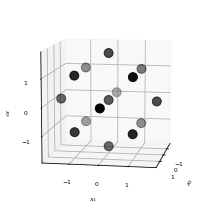

In [84]:
fig = plt.figure(figsize=(1.2*2.95,1.2*2.95))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(d_composite[:,0], d_composite[:,1], d_composite[:,2], color=plt.cm.Greys(255), marker="o", s=80, depthshade=True)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_3$")
ax.set_xticks((-1, 0, 1))
ax.set_yticks((-1, 0, 1))
ax.set_zticks((-1, 0, 1))
ax.view_init(10, 10)
plt.savefig("./figures/cc",dpi=1200,transparent=True,orientation="landscape",bbox_inches="tight")
plt.show()